In [1]:
import numpy as np
import pandas as pd
from math import isnan
import re
import matplotlib.pyplot as plt
from ape_producer.geom_reader import create_geom_df
from ape_producer.parse_report import make_cov_objects
from ape_producer.sign_conventions import signConventions, square_coordinates
from scipy.optimize import curve_fit
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_rows', 500)

In [2]:
def select_sectors(df, wheel, station):
    return df[(df.wheel==wheel) & (df.station==station)]

In [3]:
xmlFileAlign_new_2 = 'data/SM_10_6_01_2.xml'
xmlFileAlign_new_4 = 'data/SM_10_6_01_4.xml'
xmlFileAlign_new_8 = 'data/SM_10_6_01_8.xml'
xmlFileAlign_new_16 = 'data/SM_10_6_01_16.xml'
xmlFileAlign_new_31 = 'data/SM_10_6_01_31.xml'
xmlFileAlign_new_62 = 'data/SM_10_6_01_62.xml'
xmlFileAlign_new_125 = 'data/SM_10_6_01_125.xml'
xmlFileAlign_new_250 = 'data/SM_10_6_01_250.xml'
xmlFileAlign_new_500 = 'data/SM_10_6_01_500.xml'

In [4]:
RyanData = pd.DataFrame()
RyanData = pd.read_csv("data/nmuon_hesse_df.csv") 
RyanData= RyanData.astype(float)
RyanData = RyanData.apply(pd.to_numeric)

In [5]:
aligned_geom_dt_2, aligned_geom_csc_2  = create_geom_df(xmlFileAlign_new_2)
aligned_geom_dt_4, aligned_geom_csc_4  = create_geom_df(xmlFileAlign_new_4)
aligned_geom_dt_8, aligned_geom_csc_8  = create_geom_df(xmlFileAlign_new_8)
aligned_geom_dt_16, aligned_geom_csc_16  = create_geom_df(xmlFileAlign_new_16)
aligned_geom_dt_31, aligned_geom_csc_31  = create_geom_df(xmlFileAlign_new_31)
aligned_geom_dt_62, aligned_geom_csc_62  = create_geom_df(xmlFileAlign_new_62)
aligned_geom_dt_125, aligned_geom_csc_125  = create_geom_df(xmlFileAlign_new_125)
aligned_geom_dt_250, aligned_geom_csc_250 = create_geom_df(xmlFileAlign_new_250)
aligned_geom_dt_500, aligned_geom_csc_500  = create_geom_df(xmlFileAlign_new_500)

In [6]:
aligned_geom_dt_2['njobs'] = 2
aligned_geom_dt_4['njobs'] = 4
aligned_geom_dt_8['njobs'] = 8
aligned_geom_dt_16['njobs'] = 16
aligned_geom_dt_31['njobs'] = 31
aligned_geom_dt_62['njobs'] = 62
aligned_geom_dt_125['njobs'] = 125
aligned_geom_dt_250['njobs'] = 250
aligned_geom_dt_500['njobs'] = 500

In [7]:
ReturnsDF=pd.DataFrame()
for i in range(-2, 3):
    for j in range (1, 5):
        xpd = pd.DataFrame()
        xpd = {'returns:':'500','wheel':i, 'station':j, 'x std':select_sectors(aligned_geom_dt_500, i, j).std()[3],'y std':select_sectors(aligned_geom_dt_500, i, j).std()[4],'z std':select_sectors(aligned_geom_dt_500, i, j).std()[5],'phix std':select_sectors(aligned_geom_dt_500, i, j).std()[6],'phiy std':select_sectors(aligned_geom_dt_500, i, j).std()[7], 'phiz std':select_sectors(aligned_geom_dt_500, i, j).std()[8] }
        ReturnsDF=ReturnsDF.append(xpd,ignore_index=True)
        xpd = {'returns:':'250','wheel':i, 'station':j, 'x std':select_sectors(aligned_geom_dt_250, i, j).std()[3],'y std':select_sectors(aligned_geom_dt_250, i, j).std()[4],'z std':select_sectors(aligned_geom_dt_250, i, j).std()[5],'phix std':select_sectors(aligned_geom_dt_250, i, j).std()[6],'phiy std':select_sectors(aligned_geom_dt_250, i, j).std()[7], 'phiz std':select_sectors(aligned_geom_dt_250, i, j).std()[8] }
        ReturnsDF=ReturnsDF.append(xpd,ignore_index=True)
        xpd = {'returns:':'125','wheel':i, 'station':j, 'x std':select_sectors(aligned_geom_dt_125, i, j).std()[3],'y std':select_sectors(aligned_geom_dt_125, i, j).std()[4],'z std':select_sectors(aligned_geom_dt_125, i, j).std()[5],'phix std':select_sectors(aligned_geom_dt_125, i, j).std()[6],'phiy std':select_sectors(aligned_geom_dt_125, i, j).std()[7], 'phiz std':select_sectors(aligned_geom_dt_125, i, j).std()[8] }
        ReturnsDF=ReturnsDF.append(xpd,ignore_index=True)
        xpd = {'returns:':'62','wheel':i, 'station':j, 'x std':select_sectors(aligned_geom_dt_62, i, j).std()[3],'y std':select_sectors(aligned_geom_dt_62, i, j).std()[4],'z std':select_sectors(aligned_geom_dt_62, i, j).std()[5],'phix std':select_sectors(aligned_geom_dt_62, i, j).std()[6],'phiy std':select_sectors(aligned_geom_dt_62, i, j).std()[7], 'phiz std':select_sectors(aligned_geom_dt_62, i, j).std()[8] }
        ReturnsDF=ReturnsDF.append(xpd,ignore_index=True)
        xpd = {'returns:':'31','wheel':i, 'station':j, 'x std':select_sectors(aligned_geom_dt_31, i, j).std()[3],'y std':select_sectors(aligned_geom_dt_31, i, j).std()[4],'z std':select_sectors(aligned_geom_dt_31, i, j).std()[5],'phix std':select_sectors(aligned_geom_dt_31, i, j).std()[6],'phiy std':select_sectors(aligned_geom_dt_31, i, j).std()[7], 'phiz std':select_sectors(aligned_geom_dt_31, i, j).std()[8] }
        ReturnsDF=ReturnsDF.append(xpd,ignore_index=True)
        xpd = {'returns:':'16','wheel':i, 'station':j, 'x std':select_sectors(aligned_geom_dt_16, i, j).std()[3],'y std':select_sectors(aligned_geom_dt_16, i, j).std()[4],'z std':select_sectors(aligned_geom_dt_16, i, j).std()[5],'phix std':select_sectors(aligned_geom_dt_16, i, j).std()[6],'phiy std':select_sectors(aligned_geom_dt_16, i, j).std()[7], 'phiz std':select_sectors(aligned_geom_dt_16, i, j).std()[8] }
        ReturnsDF=ReturnsDF.append(xpd,ignore_index=True)
        xpd = {'returns:':'8','wheel':i, 'station':j, 'x std':select_sectors(aligned_geom_dt_8, i, j).std()[3],'y std':select_sectors(aligned_geom_dt_8, i, j).std()[4],'z std':select_sectors(aligned_geom_dt_8, i, j).std()[5],'phix std':select_sectors(aligned_geom_dt_8, i, j).std()[6],'phiy std':select_sectors(aligned_geom_dt_8, i, j).std()[7], 'phiz std':select_sectors(aligned_geom_dt_8, i, j).std()[8] }
        ReturnsDF=ReturnsDF.append(xpd,ignore_index=True)
        xpd = {'returns:':'4','wheel':i, 'station':j, 'x std':select_sectors(aligned_geom_dt_4, i, j).std()[3],'y std':select_sectors(aligned_geom_dt_4, i, j).std()[4],'z std':select_sectors(aligned_geom_dt_4, i, j).std()[5],'phix std':select_sectors(aligned_geom_dt_4, i, j).std()[6],'phiy std':select_sectors(aligned_geom_dt_4, i, j).std()[7], 'phiz std':select_sectors(aligned_geom_dt_4, i, j).std()[8] }
        ReturnsDF=ReturnsDF.append(xpd,ignore_index=True)
        xpd = {'returns:':'2','wheel':i, 'station':j, 'x std':select_sectors(aligned_geom_dt_2, i, j).std()[3],'y std':select_sectors(aligned_geom_dt_2, i, j).std()[4],'z std':select_sectors(aligned_geom_dt_2, i, j).std()[5],'phix std':select_sectors(aligned_geom_dt_2, i, j).std()[6],'phiy std':select_sectors(aligned_geom_dt_2, i, j).std()[7], 'phiz std':select_sectors(aligned_geom_dt_2, i, j).std()[8] }
        ReturnsDF=ReturnsDF.append(xpd,ignore_index=True)
        ReturnsDF=ReturnsDF[["returns:", "wheel", 'station', 'x std', 'y std', 'z std', 'phix std', 'phiy std', 'phiz std']]

        ReturnsDF = ReturnsDF.apply(pd.to_numeric)


In [8]:
Result = pd.merge(RyanData, ReturnsDF)

In [9]:
Result

,Unnamed: 0,wheel,station,nMuons_mean,nMuons_std,hesse_unc_x,hesse_unc_y,hesse_unc_z,hesse_unc_phix,hesse_unc_phiy,hesse_unc_phiz,returns:,x std,y std,z std,phix std,phiy std,phiz std
0,0.0,-2.0,1.0,11.500000,3.477198,0.237985,2.102060,1.718076,0.004486,0.002627,0.002247,2.0,0.287105,1.403319,1.105183,0.004380,0.003233,0.002420
1,0.0,-2.0,1.0,27.750000,8.069302,0.125782,0.983238,0.794517,0.002731,0.001608,0.001326,4.0,0.160666,0.979328,0.815117,0.001693,0.001515,0.001345
2,0.0,-2.0,1.0,62.333333,4.735424,0.081595,0.708898,0.573560,0.001705,0.001013,0.000845,8.0,0.103200,0.342289,0.334941,0.001665,0.000849,0.000710
3,0.0,-2.0,1.0,137.583333,12.759726,0.057537,0.503883,0.407433,0.001189,0.000701,0.000582,16.0,0.068141,0.363346,0.298254,0.000772,0.000922,0.000601
4,0.0,-2.0,1.0,304.583333,21.360364,0.037458,0.329785,0.266314,0.000780,0.000467,0.000388,31.0,0.050247,0.362276,0.281849,0.000764,0.000536,0.000434
5,0.0,-2.0,1.0,620.500000,28.433335,0.026289,0.222353,0.179356,0.000543,0.000328,0.000271,62.0,0.041613,0.146567,0.109636,0.000472,0.000338,0.000268
6,0.0,-2.0,1.0,1289.500000,24.119023,0.018557,0.160549,0.129660,0.000378,0.000227,0.000188,125.0,0.035631,0.103603,0.083537,0.000208,0.000346,0.000251
7,0.0,-2.0,1.0,2636.416667,69.097373,0.013066,0.113285,0.091486,0.000267,0.000160,0.000133,250.0,0.010510,0.091203,0.073705,0.000115,0.000156,0.000124
8,0.0,-2.0,1.0,5331.583333,93.218666,0.009126,0.079547,0.064248,0.000187,0.000112,0.000093,500.0,0.012967,0.067983,0.048829,0.000100,0.000136,0.000112
9,1.0,-2.0,2.0,13.333333,4.030189,0.190092,1.633177,1.545456,0.005589,0.002020,0.001911,2.0,0.279163,1.605900,1.367477,0.004156,0.002320,0.001981


In [10]:
def DTPlot(wheel, station, option):
    fig, DTPlot = plt.subplots()
    
    DTPlot.plot(0, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 2 ) ][option].values, 'ro', label = '2 files')
    DTPlot.plot(1, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 4 ) ][option].values, 'ro', label = '4 files')
    DTPlot.plot(2, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 8 ) ][option].values, 'ro', label = '8 files')
    DTPlot.plot(3, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 16 ) ][option].values, 'ro', label = '16 files')
    DTPlot.plot(4, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 31 ) ][option].values, 'ro', label = '31 files')
    DTPlot.plot(5, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 62 ) ][option].values, 'ro', label = '62 files')
    DTPlot.plot(6, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 125 ) ][option].values, 'ro', label = '125 files')
    DTPlot.plot(7, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 250 ) ][option].values, 'ro', label = '250 files')
    DTPlot.plot(8, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 500) ][option].values, 'ro', label = '500 files')
    ax = plt.gca()
    ax.set_xticks([0,1,2,3,4,5,6,7,8] )
    ax.set_xticklabels(["2","4","8","16","31","62","125","250","500"])
    

In [11]:
Result[(Result.wheel == 0) & (Result.station == 1) & (Result['returns:'] == 2)]['phiz std'].values

array([0.00211517])

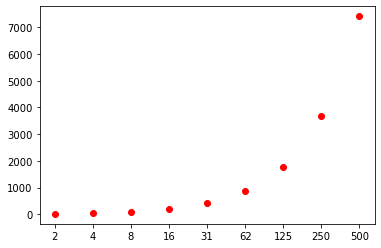

In [12]:
#nMuons_mean
#nMuons_std
#hesse_unc_x
#hesse_unc_y
#hesse_unc_z
#hesse_unc_phix
#hesse_unc_phiy
#hesse_unc_phiz
#x std
#y std
#z std
#phix std
#phiy std
#phiz std
DTPlot(1,2, "nMuons_mean")

In [13]:
def DTPlot2opt(wheel, station, option1, option2):
    fig, DTPlot = plt.subplots()
    
    DTPlot.plot(0, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 2 ) ][option].values, 'ro', label = '2 files')
    DTPlot.plot(1, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 4 ) ][option].values, 'ro', label = '4 files')
    DTPlot.plot(2, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 8 ) ][option].values, 'ro', label = '8 files')
    DTPlot.plot(3, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 16 ) ][option].values, 'ro', label = '16 files')
    DTPlot.plot(4, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 31 ) ][option].values, 'ro', label = '31 files')
    DTPlot.plot(5, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 62 ) ][option].values, 'ro', label = '62 files')
    DTPlot.plot(6, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 125 ) ][option].values, 'ro', label = '125 files')
    DTPlot.plot(7, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 250 ) ][option].values, 'ro', label = '250 files')
    DTPlot.plot(8, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 500) ][option].values, 'ro', label = '500 files')
    ax = plt.gca()

In [15]:
from scipy.optimize import curve_fit

In [57]:
def sys_func(x, p0, p1):
    return (p0 ** 2 / x + p1 ** 2) ** .5

In [109]:
def plot_wheel_station(ax, wheel, station):
    tempResults = Result[(Result.wheel==wheel) & (Result.station==station)]
    x = tempResults.nMuons_mean
    y = tempResults['x std']
    popt, pcov = curve_fit(sys_func, x, y)
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = sys_func(x_fit, *popt)
    ax.plot(x_fit, y_fit)
    ax.scatter(x, y, label='data {}/{}'.format(wheel, station))
    ax.set_xlabel('n Muons')
    print("a: {} b: {}".format(*popt))
    

a: 0.7551514536428503 b: 4.211214820467888e-06
a: -2.923896342987331 b: 3.433014101631548e-06


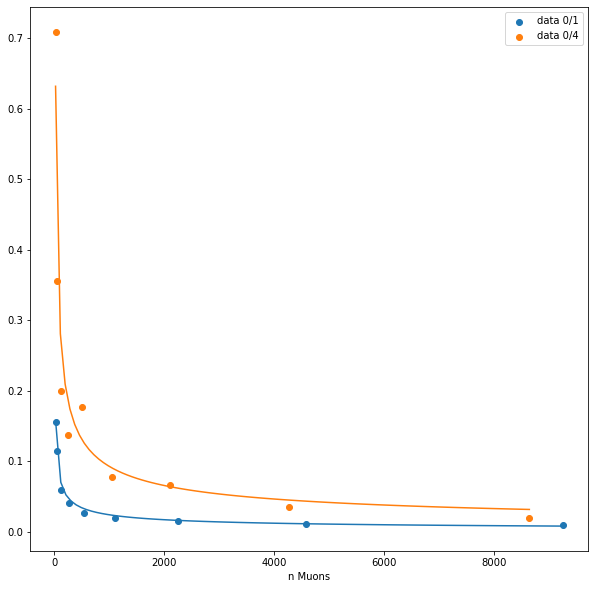

In [110]:
fig, axs = plt.subplots(1,1, figsize=(10,10))
plot_wheel_station(axs, 0, 1)

plot_wheel_station(axs, 0, 4)
axs.legend()